# Real data cleaning on Bitcoin and Ether csv file


### first we should import packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

lets import the csv file now 
here is the path to the file : [CSV.file](https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/refs/heads/master/data/btc-eth-prices-outliers.csv)

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/refs/heads/master/data/btc-eth-prices-outliers.csv') 
df

,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23
...,...,...,...
360,2018-03-28,7960.380000,445.93
361,2018-03-29,7172.280000,383.90
362,2018-03-30,6882.531667,393.82
363,2018-03-31,6935.480000,394.07


as you can see , Timestamp needs to be the index and not a column , lets fix that :

In [19]:
df.set_index("Timestamp",inplace=True)
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


look if we run the type of Timestamp we gonna see its a string not a datetime type , and its a commun problem we run into when analysing data 

In [20]:
df.index.dtype

dtype('O')

So lets convert it into datetime

In [22]:
df.index = pd.to_datetime(df.index) 
df.index

DatetimeIndex(['2017-04-02', '2017-04-03', '2017-04-04', '2017-04-05',
               '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09',
               '2017-04-10', '2017-04-11',
               ...
               '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31', '2018-04-01'],
              dtype='datetime64[ns]', name='Timestamp', length=365, freq=None)

In [23]:
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


lets run a simple visualisation using matplotlib

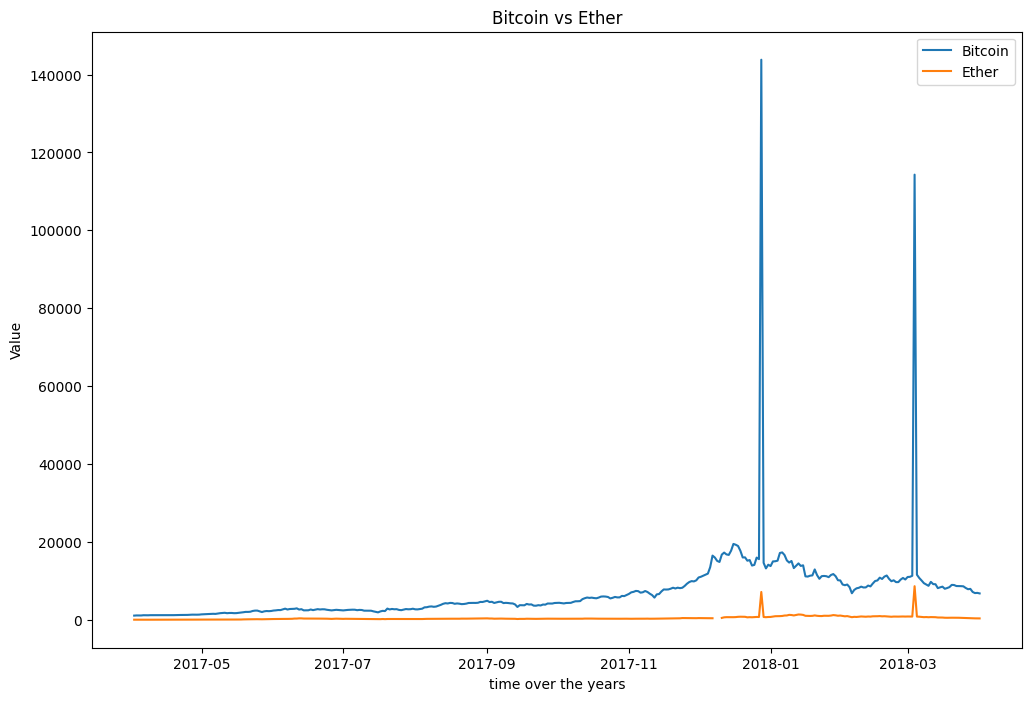

In [24]:
plt.figure(figsize=(12,8))
plt.title("Bitcoin vs Ether")
plt.plot(df.index,df['Bitcoin'] , label = 'Bitcoin') 
plt.plot(df.index,df['Ether'] , label = 'Ether')
plt.xlabel('time over the years')
plt.ylabel('Value')
plt.legend()
plt.show()

as you can see there is missing values in Ether between the date 2017-11 and 2018-01 , and clearly some invalid ones in Bitcoin and also Ether as there is some huge spikes 

### Let us focus first on the missing values

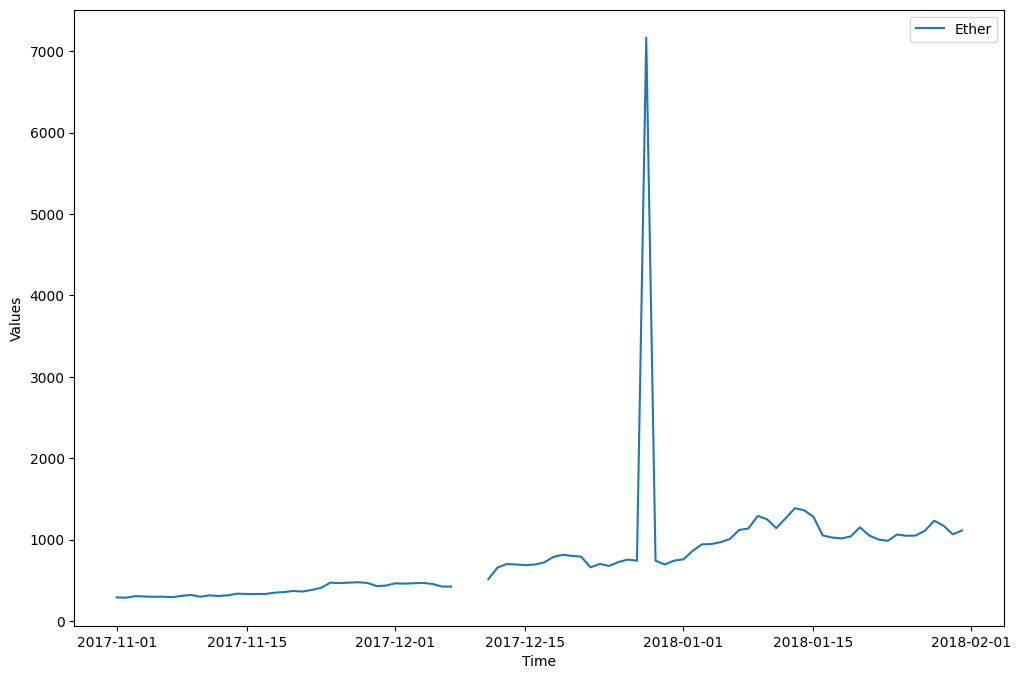

In [28]:
plt.figure(figsize=(12,8))
plt.xlabel("Time")
plt.ylabel("Values")
plt.plot(df.loc['2017-11':'2018-01'].index , df.loc['2017-11':'2018-01','Ether'] , label='Ether')
plt.legend() 
plt.show()

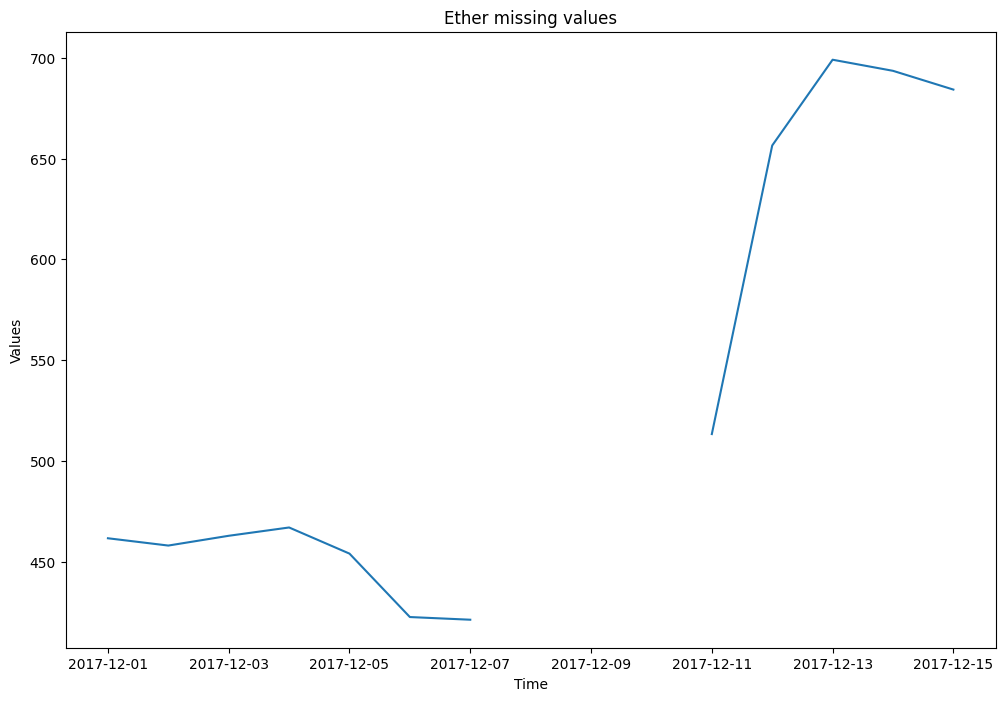

In [33]:
plt.figure(figsize=(12,8))
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Ether missing values')
plt.plot(df.loc['2017-12-01':'2017-12-15'].index , df.loc['2017-12-01':'2017-12-15','Ether']) 
plt.show()

lets check if those are nan(None) values

In [43]:
df.loc['2017-12-05':'2017-12-11'].isna()

,Bitcoin,Ether
Timestamp,,
2017-12-05,False,False
2017-12-06,False,False
2017-12-07,False,False
2017-12-08,False,True
2017-12-09,False,True
2017-12-10,False,True
2017-12-11,False,False


In [44]:
df.loc['2017-12-05':'2017-12-11']

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29


So there is some missing values as Nan , now we only need to know by what to fill them , we can fill them either by the mean of all the values , or just fill them with the values before it assuming the price didnt go up or down.

In [46]:
df.loc['2017-12-05':'2017-12-11'] = df.loc['2017-12-05':'2017-12-11'].ffill()  
df.loc['2017-12-05':'2017-12-11']

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,421.15
2017-12-09,15142.834152,421.15
2017-12-10,14869.805000,421.15
2017-12-11,16762.116667,513.29


Lets plot again the both of bictoin and Ether and see if the missing values is fixed for now

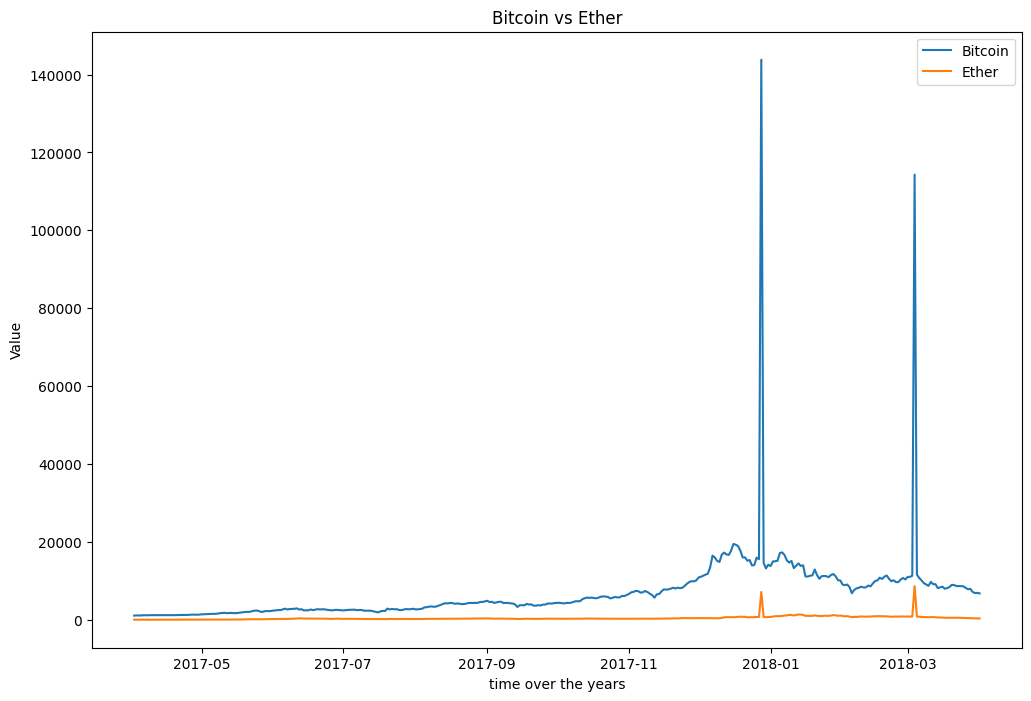

In [47]:
plt.figure(figsize=(12,8))
plt.title("Bitcoin vs Ether")
plt.plot(df.index,df['Bitcoin'] , label = 'Bitcoin') 
plt.plot(df.index,df['Ether'] , label = 'Ether')
plt.xlabel('time over the years')
plt.ylabel('Value')
plt.legend()
plt.show() 

Nice , now let us focus on the spikes , because they identify some invalid values in our graph

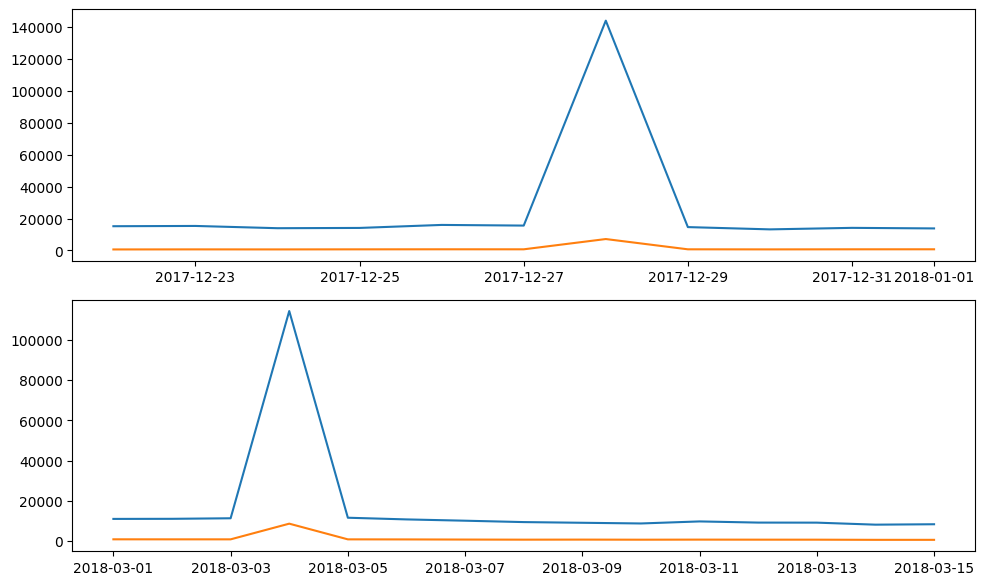

In [59]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(df.loc['2017-12-22':'2018-01-01'].index , df.loc['2017-12-22':'2018-01-01']) 
plt.subplot(2,1,2)
plt.plot(df.loc['2018-03-01':'2018-03-15'].index,df.loc['2018-03-01':'2018-03-15']) 
plt.tight_layout()
plt.show()

we can confidently guess that they are located in '2017-12-28' and in '2018-03-04' :

In [60]:
df.loc['2017-12-27':'2017-12-29']

,Bitcoin,Ether
Timestamp,,
2017-12-27,15589.321667,739.94
2017-12-28,143805.816667,7166.90
2017-12-29,14640.140000,739.60


In [61]:
df.loc['2018-03-01':'2018-03-05'] 

,Bitcoin,Ether
Timestamp,,
2018-03-01,11009.381667,869.87
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-04,114301.816667,8648.30
2018-03-05,11595.540000,849.42


let's drop them 

In [64]:
df.drop(index=['2017-12-28','2018-03-04'],inplace=True)

lets check id those values are actually gone

In [65]:
df.loc['2017-12-27':'2017-12-29']

,Bitcoin,Ether
Timestamp,,
2017-12-27,15589.321667,739.94
2017-12-29,14640.140000,739.60


In [66]:
df.loc['2018-03-01':'2018-03-05'] 

,Bitcoin,Ether
Timestamp,,
2018-03-01,11009.381667,869.87
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-05,11595.540000,849.42


nice they did got dropped lets plot again the Bitcoin and Ether graph again

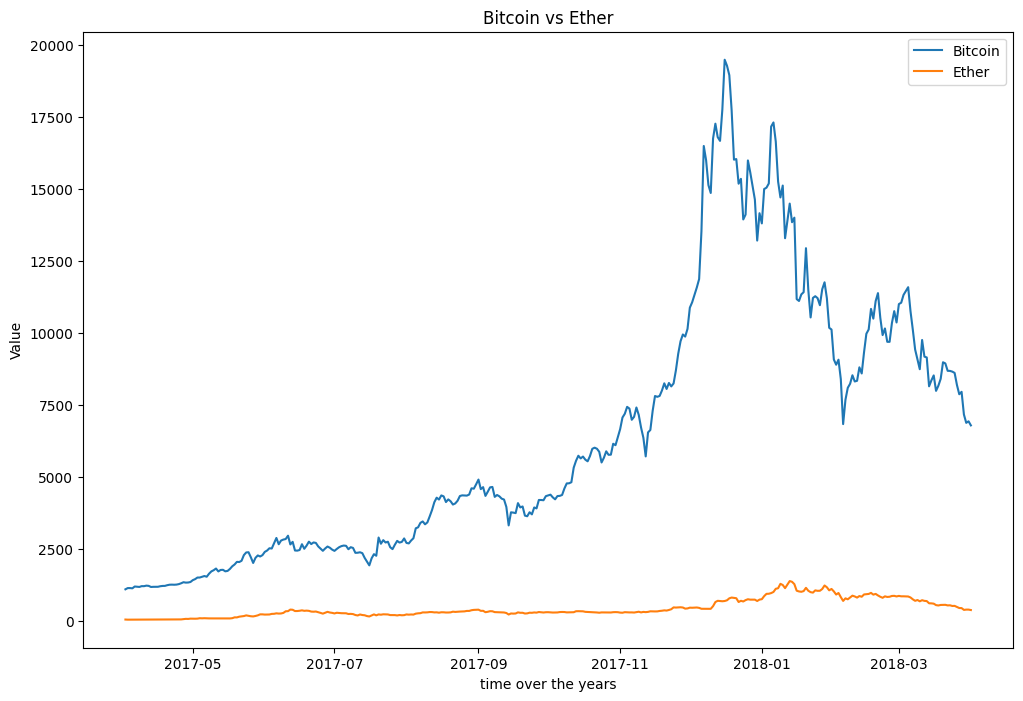

In [67]:
plt.figure(figsize=(12,8))
plt.title("Bitcoin vs Ether")
plt.plot(df.index,df['Bitcoin'] , label = 'Bitcoin') 
plt.plot(df.index,df['Ether'] , label = 'Ether')
plt.xlabel('time over the years')
plt.ylabel('Value')
plt.legend()
plt.show() 

let us compare now between the mean and median after cleaning to see the difference between them

In [68]:
df.mean()

Bitcoin    6323.509186
Ether       427.866915
dtype: float64

In [69]:
df.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

lets visualize Ether now with a histogramm to see the frequency of its values

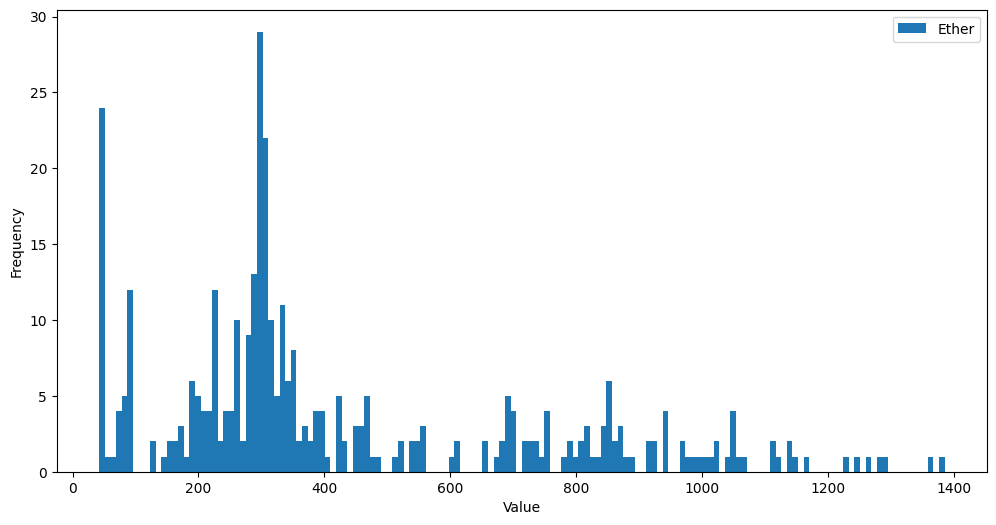

In [76]:
plt.figure(figsize=(12,6))
plt.hist(df['Ether'],bins=150,label='Ether') 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Calculating the IQR to measure centered dispersion

In [77]:
df['Bitcoin'].quantile(.75)-df['Bitcoin'].quantile(.25)

np.float64(6548.249242559523)